# 10 Species Monkey Image Classification

## The Data

In [1]:
#import os
import os, shutil

In [2]:
# Create objects to use for directory paths.

n0_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n0'
n1_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n1'
n2_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n2'
n3_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n3'
n4_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n4'
n5_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n5'
n6_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n6'
n7_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n7'
n8_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n8'
n9_images = '/Users/andrewozbun/Desktop/Monkey_Images/training/n9'

In [3]:
# Directory with Mantled Howler.
n0_dir = os.path.join(n0_images)

# Directory with Patas Monkey.
n1_dir = os.path.join(n1_images)

# Directory with Bald Uakari.
n2_dir = os.path.join(n2_images)

# Directory with Japanese Macaque.
n3_dir = os.path.join(n3_images)

# Directory with Pygmy Marmoset.
n4_dir = os.path.join(n4_images)

# Directory with White Headed Capuchin.
n5_dir = os.path.join(n5_images)

# Directory with Silvery Marmoset.
n6_dir = os.path.join(n6_images)

# Directory with Common Squirrel Monkey.
n7_dir = os.path.join(n7_images)

# Directory with Black Headed Night Monkey.
n8_dir = os.path.join(n8_images)

# Directory with Nilgiri Langur
n9_dir = os.path.join(n9_images)

In [4]:
print('total Mantled Howler images:', len(os.listdir(n0_dir)))
print('total Patas Monkey images:', len(os.listdir(n1_dir)))
print('total Bald Uakari images:', len(os.listdir(n2_dir)))
print('total Japanese Macaque images:', len(os.listdir(n3_dir)))
print('total Pygmy Marmoset images:', len(os.listdir(n4_dir)))
print('total White Headed Capuchin images:', len(os.listdir(n5_dir)))
print('total Silvery Marmoset images:', len(os.listdir(n6_dir)))
print('total Common Squirrl Monkey images:', len(os.listdir(n7_dir)))
print('total Black Headed Night Monkey images:', len(os.listdir(n8_dir)))
print('total Nilgiri Langur images:', len(os.listdir(n9_dir)))

total Mantled Howler images: 105
total Patas Monkey images: 111
total Bald Uakari images: 110
total Japanese Macaque images: 122
total Pygmy Marmoset images: 105
total White Headed Capuchin images: 113
total Silvery Marmoset images: 106
total Common Squirrl Monkey images: 114
total Black Headed Night Monkey images: 106
total Nilgiri Langur images: 106


### Data Visualization

In [5]:
train_n0 = os.listdir(n0_dir)
print(train_n0[:5])

train_n1 = os.listdir(n1_dir)
print(train_n1[:5])

['n0038.jpg', 'n0164.jpg', 'n0170.jpg', 'n0158.jpg', 'n0159.jpg']
['n1118.jpg', 'n1130.jpg', 'n1124.jpg', 'n1044.jpg', 'n1050.jpg']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

In [8]:
# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_n0_pix = [os.path.join(n0_dir, fname) 
                for fname in train_n0[pic_index-8:pic_index]]
next_n1_pix = [os.path.join(n1_dir, fname) 
                for fname in train_n1[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

Mantled Howler



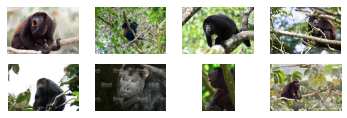

Patas Monkey



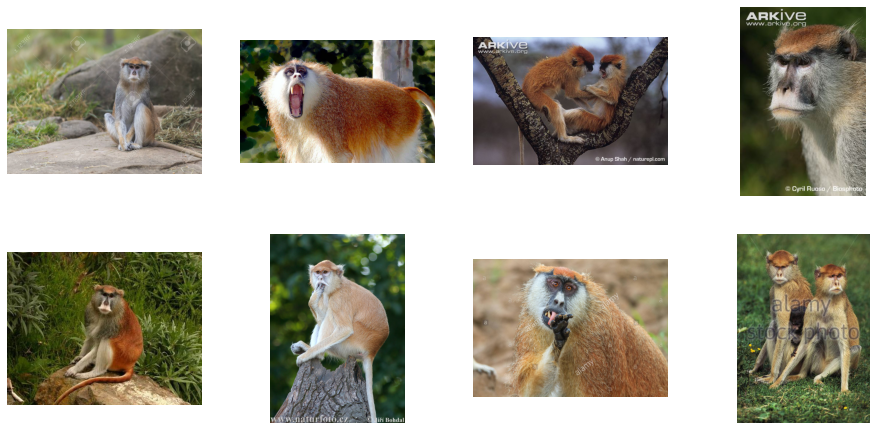

In [9]:
print ("Mantled Howler")
print()
for i, img_path in enumerate(next_n0_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Patas Monkey")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_n1_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Building Model

**MLP v CNN**

### MLP

In [10]:
# Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical



#set as objects
directory = '/Users/andrewozbun/Desktop/Monkey_Images/training'
train_batches = ImageDataGenerator().flow_from_directory(directory, target_size=(225, 225), 
                                                         classes = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9'],
                                                         batch_size=25)



# Classification MLP(Multilayer perceptron) 
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(350, activation=keras.activations.relu),
    keras.layers.Dense(50, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

#Model
	
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_batches, epochs=10, verbose=1)
          

Found 1098 images belonging to 10 classes.
Epoch 1/10
44/44 [==============================] - 32s 738ms/step - loss: 8722.4404 - accuracy: 0.1102
Epoch 2/10
44/44 [==============================] - 32s 728ms/step - loss: 2.6255 - accuracy: 0.1038
Epoch 3/10
44/44 [==============================] - 32s 727ms/step - loss: 2.3025 - accuracy: 0.1038
Epoch 4/10
44/44 [==============================] - 31s 709ms/step - loss: 2.3025 - accuracy: 0.1020
Epoch 5/10
44/44 [==============================] - 30s 693ms/step - loss: 2.3024 - accuracy: 0.1093
Epoch 6/10
44/44 [==============================] - 30s 684ms/step - loss: 2.3024 - accuracy: 0.1111
Epoch 7/10
44/44 [==============================] - 30s 693ms/step - loss: 2.3023 - accuracy: 0.1111
Epoch 8/10
44/44 [==============================] - 32s 717ms/step - loss: 2.3022 - accuracy: 0.1111
Epoch 9/10
44/44 [==============================] - 32s 717ms/step - loss: 2.3022 - accuracy: 0.1111
Epoch 10/10
44/44 [==========================

### CNN

In [11]:
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 225x 225 with 3 bytes color, RGB?
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 10 output neurons for 10 classes with the softmax activation
    tf.keras.layers.Dense(30, activation='softmax')
])


In [12]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_batches, epochs=10, batch_size=20, verbose=1)

Epoch 1/10
44/44 [==============================] - 42s 953ms/step - loss: 5.5249 - accuracy: 0.1302
Epoch 2/10
44/44 [==============================] - 40s 900ms/step - loss: 1.7884 - accuracy: 0.3424
Epoch 3/10
44/44 [==============================] - 41s 925ms/step - loss: 1.3927 - accuracy: 0.5064
Epoch 4/10
44/44 [==============================] - 41s 921ms/step - loss: 1.1698 - accuracy: 0.6129
Epoch 5/10
44/44 [==============================] - 40s 917ms/step - loss: 1.0903 - accuracy: 0.6321
Epoch 6/10
44/44 [==============================] - 40s 915ms/step - loss: 0.7791 - accuracy: 0.7259
Epoch 7/10
44/44 [==============================] - 40s 919ms/step - loss: 0.6681 - accuracy: 0.7632
Epoch 8/10
44/44 [==============================] - 40s 915ms/step - loss: 0.5473 - accuracy: 0.8106
Epoch 9/10
44/44 [==============================] - 39s 891ms/step - loss: 0.4125 - accuracy: 0.8634
Epoch 10/10
44/44 [==============================] - 39s 880ms/step - loss: 0.2736 - accura

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)       

In [14]:
model.evaluate(test_images, test_labels)

NameError: name 'test_images' is not defined

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(practical_test_images)):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow()